# Importing Libraries

In [36]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

# Function Definition

In [37]:
def FalsePosition(f, a, b, e, N=MaxIterations):
   
    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)
    x1 = copy.copy(b)

    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    if f(x0) * f(x1) > 0.0:
        print('Given guess values do not bracket the root.')
        print('Try Again with different guess values.')
        return 0,0
    else:
        data = []       # list for storing data to plot table
        accuracy = []   # list for storing data to plot graph
        
        step = 1
        
        while step <= N :
            
            x2 = (x0*f(x1) - x1*f(x0))/( f(x1) - f(x0) )      # Both formula's are same 
            # x2 = x1 - (f(x1)*(x1-x0))/(f(x1) - f(x0))
            

            print(f'Iteration-{step:3}, x0 = {x0:.6f}  x1 = {x1:.6f}  x2 = {x2:.6f} and f(x2) = {f(x2):.6f}')

            # Adding data in data list which was created for plotting table
            data.append([step,x0,x1,x2,f(x2),f(x0),f(x1)])

            if(abs(x2-x0)<e and abs(f(x2)) <e):
                
                print("\nFinal Root Found")
                print(f'Iteration-{step:3}, x0 = {x0:.6f}  x1 = {x1:.6f}  x2 = {x2:.6f} and f(x2) = {f(x2):.6f}')
                print(f"Required Root is: {x2:.6f}")
                break
            
            accuracyReached = 0

            if f(x0) * f(x2) < 0:
                accuracyReached = abs(x1-x2)
                x1 = x2
            else:
                accuracyReached = abs(x0-x2)
                x0 = x2
            
            # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
            accuracy.append([step,accuracyReached])

            step = step + 1
        
        # Making table with prettytable module and adding data in it    
        table = ptbl(['Iteration','x0','x1','x2','f(x2)'])
        for dt in data:
            table.add_row(dt[:-2])

        if step > N:
            print('Not Convergent!')

        return accuracy,table,data

# Input Section

In [38]:
# Defining Function
def f(x):
    q = cos(x) - x*exp(x)
    return q


x0 = 0.0
x1 = 1.0

e = 0.001

# Calling Function

In [39]:
f_acc,False_position_table,f_data = FalsePosition(f,x0,x1,e)




*** FALSE POSITION METHOD IMPLEMENTATION ***
Iteration-  1, x0 = 0.000000  x1 = 1.000000  x2 = 0.314665 and f(x2) = 0.519871
Iteration-  2, x0 = 0.314665  x1 = 1.000000  x2 = 0.446728 and f(x2) = 0.203545
Iteration-  3, x0 = 0.446728  x1 = 1.000000  x2 = 0.494015 and f(x2) = 0.070802
Iteration-  4, x0 = 0.494015  x1 = 1.000000  x2 = 0.509946 and f(x2) = 0.023608
Iteration-  5, x0 = 0.509946  x1 = 1.000000  x2 = 0.515201 and f(x2) = 0.007760
Iteration-  6, x0 = 0.515201  x1 = 1.000000  x2 = 0.516922 and f(x2) = 0.002539
Iteration-  7, x0 = 0.516922  x1 = 1.000000  x2 = 0.517485 and f(x2) = 0.000829

Final Root Found
Iteration-  7, x0 = 0.516922  x1 = 1.000000  x2 = 0.517485 and f(x2) = 0.000829
Required Root is: 0.517485


## Convergence Plot

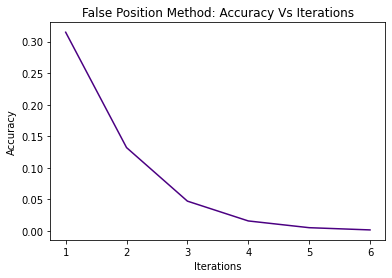

In [40]:



if f_acc!=0:
    f_i = []
    f_a = []
    for i in f_acc:             # For Accuracy vs Iteration Plot
        f_i.append(i[0])
        f_a.append(i[1])
    plt.title("False Position Method: Accuracy Vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.plot(f_i,f_a,color = 'indigo')
    plt.show()
    
    
    

## False Position Method Table

In [41]:
if f_acc!=0:
    print(False_position_table)

+-----------+---------------------+-----+---------------------+-----------------------+
| Iteration |          x0         |  x1 |          x2         |         f(x2)         |
+-----------+---------------------+-----+---------------------+-----------------------+
|     1     |         0.0         | 1.0 | 0.31466533780077094 |   0.5198711737709334  |
|     2     | 0.31466533780077094 | 1.0 | 0.44672814459133386 |  0.20354477776832103  |
|     3     | 0.44672814459133386 | 1.0 |  0.4940153365958987 |  0.07080234897836546  |
|     4     |  0.4940153365958987 | 1.0 |  0.5099461403652471 |  0.023607718826251012 |
|     5     |  0.5099461403652471 | 1.0 |  0.5152010099022496 |  0.007760113728615847 |
|     6     |  0.5152010099022496 | 1.0 |  0.5169222100105165 | 0.0025388646887650745 |
|     7     |  0.5169222100105165 | 1.0 |  0.517484676784512  | 0.0008293578901883425 |
+-----------+---------------------+-----+---------------------+-----------------------+


## Function Plot

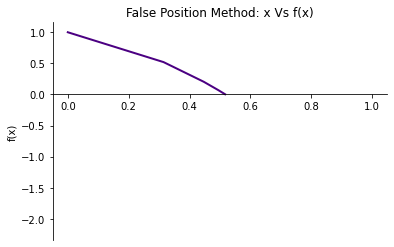

In [42]:
if f_acc!=0:
    f_a = []
    f_b = []
    f_fa =[]
    f_fb =[]    
    for i in range(len(f_data)):    # For function plot
        f_a.append(f_data[i][1])
        f_b.append(f_data[i][2])
        f_fa.append(f_data[i][5])
        f_fb.append(f_data[i][6])

        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    # ax.spines['left'].set_position('center')  # To move y-axis to center
    ax.spines['bottom'].set_position(('data',0))    # To move x-axis to center

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.title("False Position Method: x Vs f(x)")
    plt.ylabel("f(x)")

    plt.plot(f_a,f_fa,f_b,f_fb,color='indigo',linewidth=2)
    plt.show()